## 📊 FASE 3 — Análisis Exploratorio de Datos (EDA)

### 🧩 BLOQUE 1 — Estructura y consistencia de los datos  

In [3]:
# ==============================================
# FASE 3 – EDA (Análisis Exploratorio de Datos)
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Configuración estética
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (12,6)

# Cargar datos limpios
bbva = pd.read_csv("../data/interim/precios_limpios/BBVA_core_clean.csv", parse_dates=["Date"])
san = pd.read_csv("../data/interim/precios_limpios/SAN_core_clean.csv", parse_dates=["Date"])

# Mostrar estructura
print("BBVA:")
display(bbva.head())
print("\nSantander:")
display(san.head())

# Comprobamos rango temporal y valores nulos
print("\nFechas BBVA:", bbva["Date"].min(), "→", bbva["Date"].max())
print("Fechas Santander:", san["Date"].min(), "→", san["Date"].max())
print("\nValores nulos BBVA:\n", bbva.isna().sum())
print("\nValores nulos Santander:\n", san.isna().sum())


BBVA:


,Date,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Dividends_bin
0,2000-01-03,4.040035,13.623349,0.0,13.757854,13.594527,13.690602,0.0,8244257,0
1,2000-01-04,3.934617,13.267874,0.0,13.536882,13.219837,13.450416,0.0,8522096,0
2,2000-01-05,3.846296,12.970044,0.0,13.210230,12.912399,13.142977,0.0,12159826,0
3,2000-01-06,3.846296,12.970044,0.0,12.970044,12.970044,12.970044,0.0,0,0
4,2000-01-07,3.894731,13.133370,0.0,13.248659,12.998866,13.248659,0.0,62261944,0



Santander:


,Date,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Dividends_bin
0,2000-01-03,2.625066,9.849401,0.0,9.987881,9.736886,9.953261,0.0,8797337,0
1,2000-01-04,2.562784,9.615716,0.0,9.780161,9.529166,9.728231,0.0,8811013,0
2,2000-01-05,2.500501,9.382031,0.0,9.555131,9.304136,9.433961,0.0,9333517,0
3,2000-01-06,2.500501,9.382031,0.0,9.382031,9.382031,9.382031,0.0,0,0
4,2000-01-07,2.611227,9.797471,0.0,9.823436,9.442616,9.451271,0.0,9603132,0



Fechas BBVA: 2000-01-03 00:00:00 → 2025-10-30 00:00:00
Fechas Santander: 2000-01-03 00:00:00 → 2025-10-30 00:00:00

Valores nulos BBVA:
 Date             0
Adj Close        0
Close            0
Dividends        0
High             0
Low              0
Open             0
Stock Splits     0
Volume           0
Dividends_bin    0
dtype: int64

Valores nulos Santander:
 Date             0
Adj Close        0
Close            0
Dividends        0
High             0
Low              0
Open             0
Stock Splits     0
Volume           0
Dividends_bin    0
dtype: int64


**Qué se muestra:**  
- Rango temporal: desde el **3 de enero de 2000** hasta el **30 de octubre de 2025**.  
- Ninguna columna presenta valores nulos.  

**Interpretación:**  
- El rango cubre **más de 25 años de cotización diaria**, suficiente para analizar ciclos completos del mercado (precrisis, crisis de 2008, recuperación, COVID, etc.).  
- No hay valores faltantes, lo que indica una **extracción y limpieza correcta**.  
- Los datos son coherentes y comparables entre ambos bancos (tienen el mismo rango de fechas y estructura).  

**Conclusión parcial:**  
→ El dataset está **limpio, completo y perfectamente alineado temporalmente**, lo que garantiza fiabilidad en las comparaciones y en el modelado posterior.

---

### 📈 BLOQUE 2 — Evolución de precios y volumen

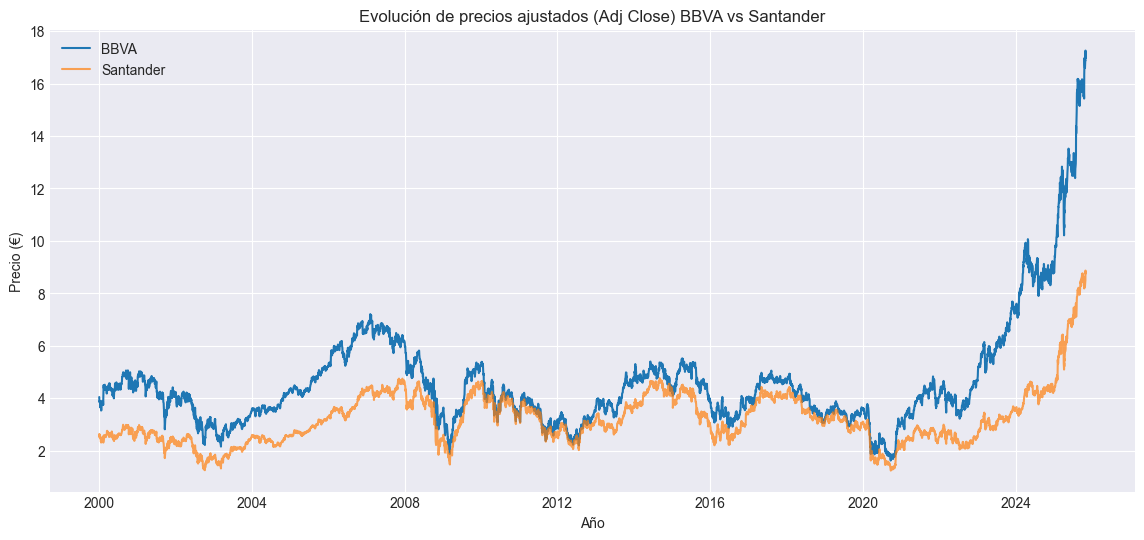

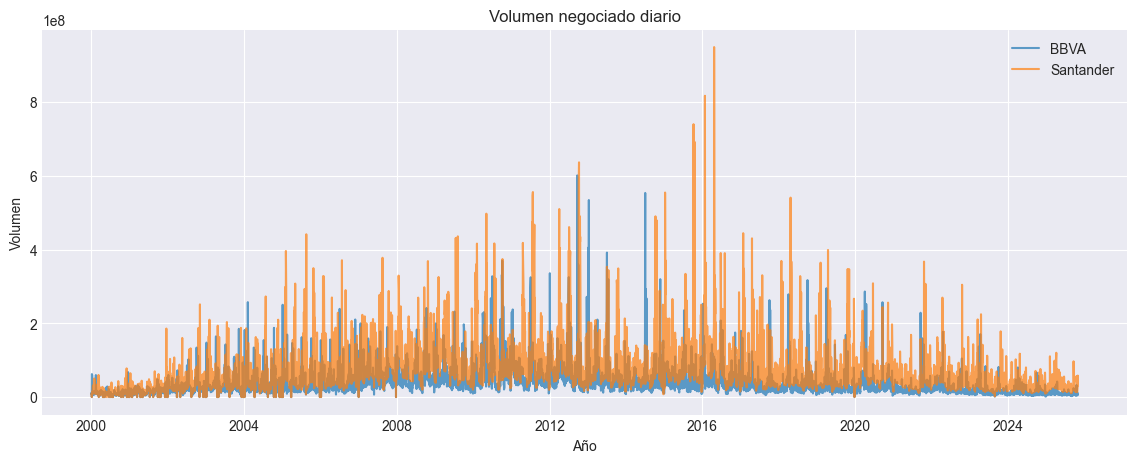

In [4]:
# Serie de precios (Adj Close)
plt.figure(figsize=(14,6))
plt.plot(bbva["Date"], bbva["Adj Close"], label="BBVA")
plt.plot(san["Date"], san["Adj Close"], label="Santander", alpha=0.7)
plt.title("Evolución de precios ajustados (Adj Close) BBVA vs Santander")
plt.xlabel("Año")
plt.ylabel("Precio (€)")
plt.legend()
plt.show()

# Volumen de negociación
plt.figure(figsize=(14,5))
plt.plot(bbva["Date"], bbva["Volume"], label="BBVA", alpha=0.7)
plt.plot(san["Date"], san["Volume"], label="Santander", alpha=0.7)
plt.title("Volumen negociado diario")
plt.xlabel("Año")
plt.ylabel("Volumen")
plt.legend()
plt.show()


**Gráfico 1: “Evolución de precios ajustados (Adj Close)”**  
- Muestra la trayectoria bursátil de **BBVA (azul)** y **Santander (naranja)**.  
- Ambas acciones siguen un patrón muy parecido: suben y bajan casi al mismo tiempo.  
- Destacan:
  - **Burbuja financiera (2007–2008):** fuerte subida y posterior caída.  
  - **Crisis de deuda europea (2011–2012):** nueva bajada.  
  - **Caída por COVID (2020):** fuerte desplome.  
  - **Subida 2022–2025:** fuerte recuperación, con BBVA marcando máximos históricos.

**Gráfico 2: “Volumen negociado diario”**  
- Refleja la **liquidez y actividad en el mercado**.  
- Santander tiene picos de volumen más altos, lo que indica **mayor cantidad de operaciones** o presencia de inversores institucionales.  
- El volumen general tiende a disminuir a partir de 2018, reflejando menor rotación en el mercado bursátil.  

**Conclusión parcial:**  
→ Los dos bancos se mueven de forma **muy sincronizada** y comparten los grandes ciclos económicos.  
→ Santander muestra una mayor **intensidad operativa**, mientras BBVA tiene un **crecimiento más pronunciado en los últimos años**.

---

### 📊 BLOQUE 3 — Retornos y correlación  

Media de retornos BBVA: 0.000448
Media de retornos Santander: 0.000422


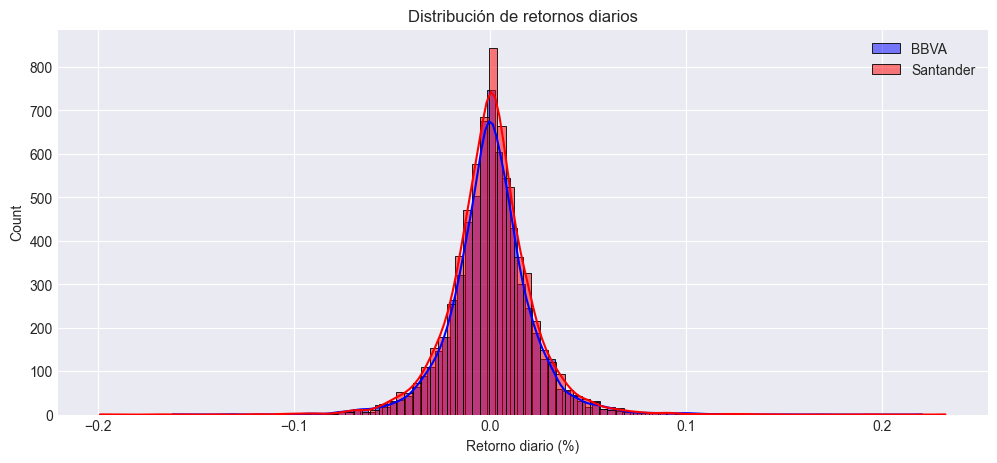

Correlación entre retornos BBVA y Santander: 0.870


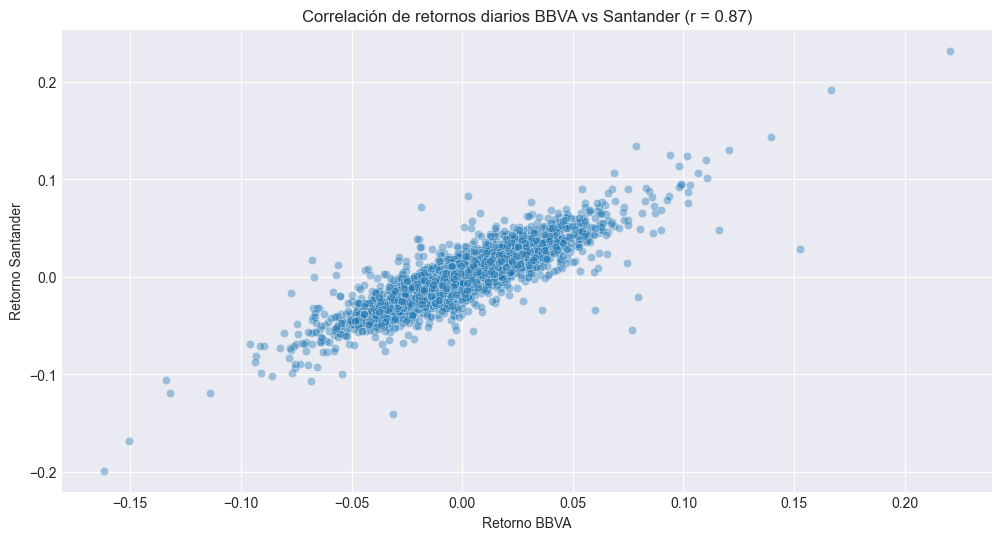

In [5]:
# Calcular retornos diarios (variación porcentual)
bbva["Return"] = bbva["Adj Close"].pct_change()
san["Return"] = san["Adj Close"].pct_change()

# Promedio y desviación típica
print("Media de retornos BBVA:", round(bbva["Return"].mean(),6))
print("Media de retornos Santander:", round(san["Return"].mean(),6))

# Distribución de retornos
plt.figure(figsize=(12,5))
sns.histplot(bbva["Return"], bins=100, color="blue", label="BBVA", kde=True)
sns.histplot(san["Return"], bins=100, color="red", label="Santander", kde=True)
plt.title("Distribución de retornos diarios")
plt.xlabel("Retorno diario (%)")
plt.legend()
plt.show()

# Correlación entre retornos de ambos bancos
merged = pd.merge(bbva[["Date","Return"]], san[["Date","Return"]], on="Date", suffixes=("_BBVA", "_SAN"))
corr = merged["Return_BBVA"].corr(merged["Return_SAN"])
print(f"Correlación entre retornos BBVA y Santander: {corr:.3f}")

# Visualización
sns.scatterplot(x="Return_BBVA", y="Return_SAN", data=merged, alpha=0.4)
plt.title(f"Correlación de retornos diarios BBVA vs Santander (r = {corr:.2f})")
plt.xlabel("Retorno BBVA")
plt.ylabel("Retorno Santander")
plt.show()

**Valores calculados:**  
- Media de retornos diarios:  
  - **BBVA:** 0.000448 (≈ 0.045 %)  
  - **Santander:** 0.000422 (≈ 0.042 %)  
- **Correlación entre retornos:** 0.87  

**Gráficos:**  
1. **Distribución de retornos:**  
   - Ambas distribuciones son casi idénticas, centradas en 0, con colas alargadas (picos extremos).  
   - Refleja un comportamiento típico de series financieras: la mayoría de variaciones son pequeñas, pero hay eventos de alta volatilidad (crisis).  

2. **Correlación de retornos (r = 0.87):**  
   - La nube de puntos muestra una clara tendencia lineal positiva.  
   - Cuando BBVA sube, Santander tiende a subir también, y viceversa.  
   - Una correlación tan alta indica **movimientos casi paralelos**, consecuencia de que ambos pertenecen al mismo sector bancario español.  

**Conclusión parcial:**  
→ Los rendimientos de ambos bancos están **fuertemente correlacionados** y muestran **distribuciones simétricas** con eventos extremos en momentos de crisis.  
→ No hay sesgos ni comportamientos independientes: su evolución es prácticamente conjunta.

---

### 📉 BLOQUE 4 — Descomposición de la serie (tendencia, estacionalidad, residuales)

C:\Users\lopec\AppData\Local\Temp\ipykernel_6756\3198773012.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bbva_monthly = bbva.set_index("Date")["Adj Close"].resample("M").mean()
C:\Users\lopec\AppData\Local\Temp\ipykernel_6756\3198773012.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  san_monthly = san.set_index("Date")["Adj Close"].resample("M").mean()


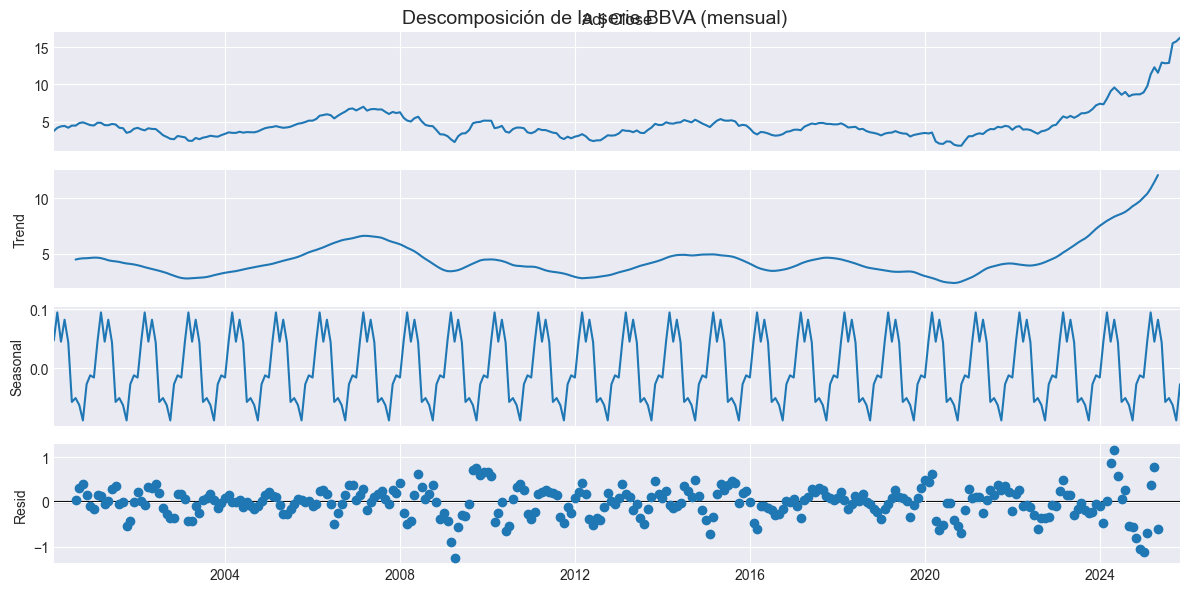

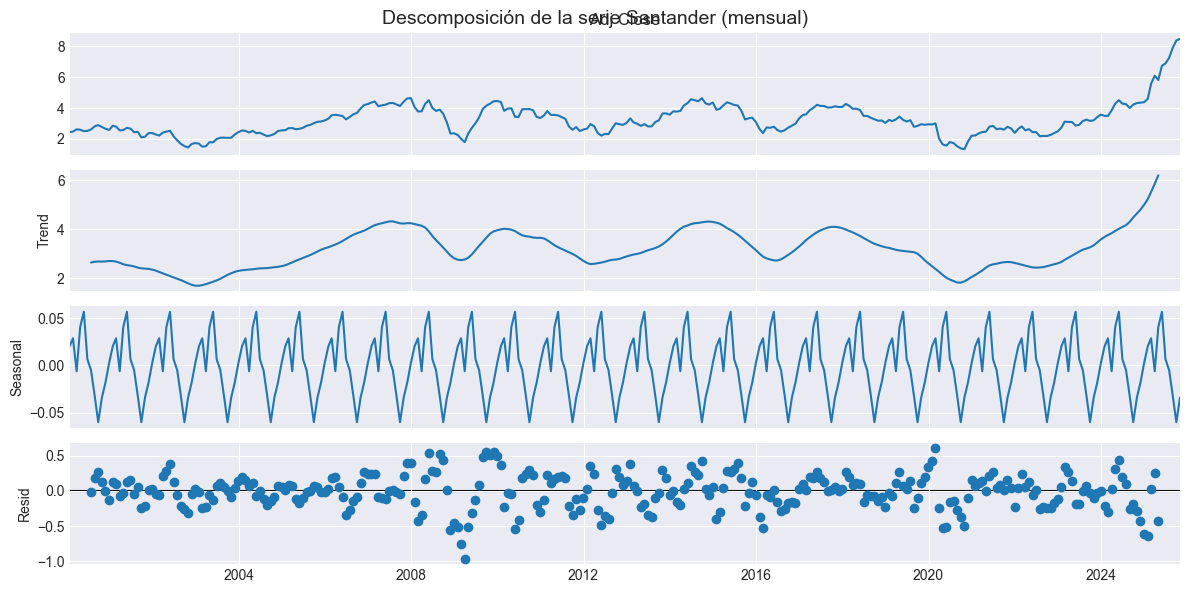

In [6]:
# Para que funcione bien la descomposición, seleccionamos una frecuencia mensual o semanal
bbva_monthly = bbva.set_index("Date")["Adj Close"].resample("M").mean()
san_monthly = san.set_index("Date")["Adj Close"].resample("M").mean()

# Descomposición BBVA
decomp_bbva = seasonal_decompose(bbva_monthly.dropna(), model="additive", period=12)
decomp_bbva.plot()
plt.suptitle("Descomposición de la serie BBVA (mensual)", fontsize=14)
plt.show()

# Descomposición Santander
decomp_san = seasonal_decompose(san_monthly.dropna(), model="additive", period=12)
decomp_san.plot()
plt.suptitle("Descomposición de la serie Santander (mensual)", fontsize=14)
plt.show()


**Qué muestra cada panel:**  
1. **Trend (tendencia):**  
   - Refleja el movimiento estructural de largo plazo.  
   - Se observan tres grandes fases:  
     - 2000–2007: crecimiento.  
     - 2008–2020: estancamiento y caídas.  
     - 2021–2025: fuerte tendencia alcista.  

2. **Seasonal (estacionalidad):**  
   - Oscilaciones periódicas dentro del año, leves pero visibles.  
   - Puede deberse a resultados trimestrales, pagos de dividendos o campañas financieras.  

3. **Residual (ruido):**  
   - Variaciones irregulares no explicadas por tendencia o estacionalidad.  
   - No muestra patrones fuertes, lo que es esperable en datos bursátiles (alto componente aleatorio).  

**Conclusión parcial:**  
→ Las acciones muestran **una clara tendencia cíclica y sincronizada**, con periodos de auge y crisis.  
→ La estacionalidad es **moderada**, pero repetitiva a nivel anual.  
→ La estructura temporal es estable, lo que permitirá a las RNN/LSTM captar tanto dependencias de corto como de largo plazo.

---

### 🧾 CONCLUSIÓN GLOBAL DE LA FASE 3 (EDA)

- El dataset abarca **25 años de información continua y limpia**, sin huecos ni inconsistencias.  
- Las series de BBVA y Santander presentan **comportamientos casi idénticos**, tanto en precios como en retornos.  
- Las grandes crisis (2008, 2012, 2020) se reflejan claramente en ambos, con **alta correlación (r ≈ 0.87)**.  
- Santander tiene **mayor volumen de negociación**, mientras BBVA muestra **mayor crecimiento reciente**.  
- Los retornos diarios siguen una distribución típica del mercado financiero: centrada en 0, con eventos extremos ocasionales.  
- La descomposición temporal evidencia una **tendencia cíclica global**, con fases de crecimiento, corrección y recuperación.  

**En resumen:**  
Las acciones de BBVA y Santander muestran una **dinámica altamente sincronizada y predecible en el largo plazo**, lo que las convierte en excelentes candidatas para el uso de **modelos recurrentes (RNN, LSTM, GRU)** capaces de aprender patrones temporales y dependencias entre ambas.